# Building and Solving a Maze using Graph Algorithms

In this short experimental program, we use grids based on our graph class to construct a maze.
Then we apply our previously implemented algorithm for finding a shortest path to solve this maze.

In [1]:
import sys
sys.path.append('C:\\Users\\acer\\basic_algorithms_python\\graph')

from graph import Graph
from matplotlib.pyplot import figure
from PIL import Image

In [2]:
# set the width and height of the grid
width = 7
height = 6

In [3]:
chars = [chr(x) for x in list(range(65, 65+width))]
chars

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [16]:
grid = Graph()
for x in range(height):
    for y in chars:
        grid.add_vertex(str(x)+y)
        
for x in range(height):
    for y in chars[:-1]:
        grid.add_edge(str(x)+y , str(x+1)+y)
        grid.add_edge(str(x)+y , str(x)+chr(ord(y)+1))
    grid.add_edge(str(x)+chars[-1] , str(x+1)+chars[-1])

for y in chars[:-1]:
    grid.add_edge(str(height)+y , str(height)+chr(ord(y)+1))

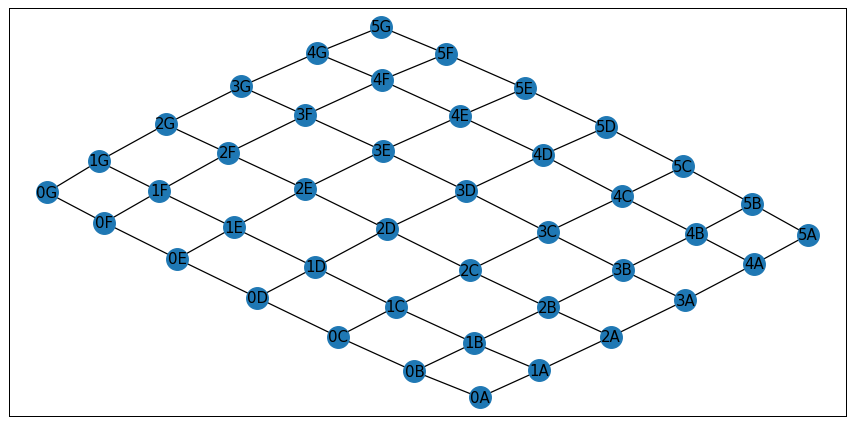

In [17]:
figure(figsize=(12,6), dpi=90)
grid.plot_connections()

# Converting or grid into a maze by removing the following edges:


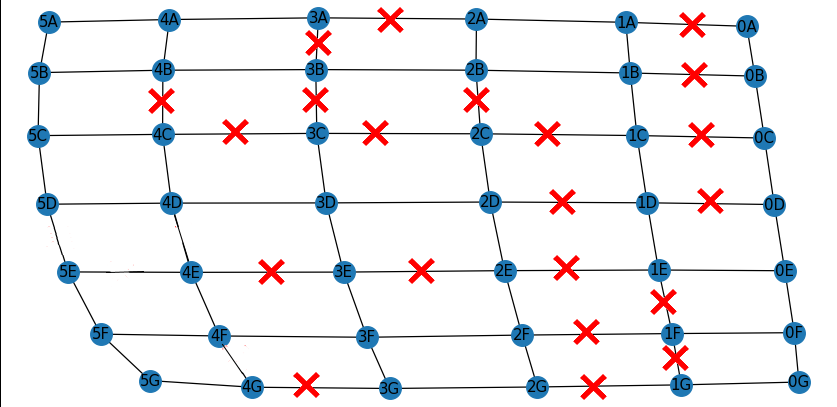

In [6]:
img = Image.open("graph/grid01_1.png")
img

In [7]:
print(grid)

{'0A': ['1A', '0B'], '0B': ['0A', '1B', '0C'], '0C': ['0B', '1C', '0D'], '0D': ['0C', '1D', '0E'], '0E': ['0D', '1E', '0F'], '0F': ['0E', '1F', '0G'], '0G': ['0F', '1G'], '1A': ['0A', '2A', '1B'], '1B': ['0B', '1A', '2B', '1C'], '1C': ['0C', '1B', '2C', '1D'], '1D': ['0D', '1C', '2D', '1E'], '1E': ['0E', '1D', '2E', '1F'], '1F': ['0F', '1E', '2F', '1G'], '1G': ['0G', '1F', '2G'], '2A': ['1A', '3A', '2B'], '2B': ['1B', '2A', '3B', '2C'], '2C': ['1C', '2B', '3C', '2D'], '2D': ['1D', '2C', '3D', '2E'], '2E': ['1E', '2D', '3E', '2F'], '2F': ['1F', '2E', '3F', '2G'], '2G': ['1G', '2F', '3G'], '3A': ['2A', '4A', '3B'], '3B': ['2B', '3A', '4B', '3C'], '3C': ['2C', '3B', '4C', '3D'], '3D': ['2D', '3C', '4D', '3E'], '3E': ['2E', '3D', '4E', '3F'], '3F': ['2F', '3E', '4F', '3G'], '3G': ['2G', '3F', '4G'], '4A': ['3A', '5A', '4B'], '4B': ['3B', '4A', '5B', '4C'], '4C': ['3C', '4B', '5C', '4D'], '4D': ['3D', '4C', '5D', '4E'], '4E': ['3E', '4D', '5E', '4F'], '4F': ['3F', '4E', '5F', '4G'], '4G': [

In [8]:
blocked_edges = [("0A", "1A"), ("0B", "1B"), ("0C", "1C"), ("0D", "1D"), ("1E", "1F"), ("1F", "1G"), ("1C", "2C"), 
                ("1D", "2D"), ("1E", "2E"), ("1F", "2F"), ("1G", "2G"), ("2B", "2C"), ("3A", "2A"), ("2C", "3C"), 
                ("2E", "3E"), ("3A", "3B"), ("3B", "3C"), ("3C", "4C"), ("3E", "4E"), ("3G", "4G"), ("4B", "4C")]
for edge in blocked_edges:
    grid.remove_edge(edge[0], edge[1])

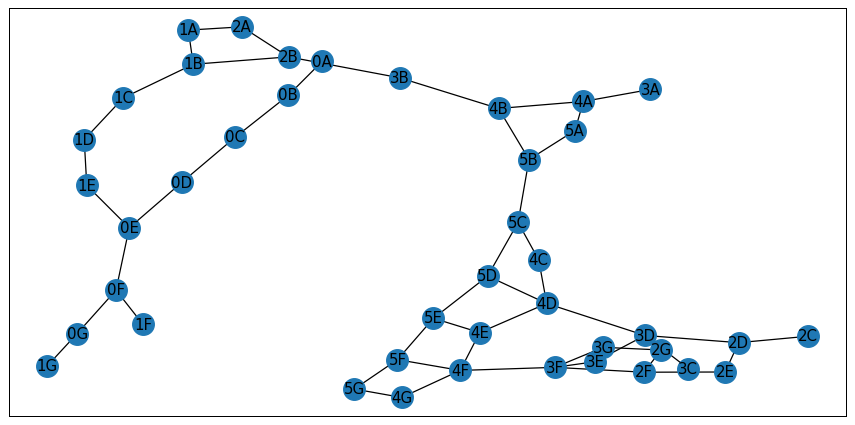

In [9]:
figure(figsize=(12,6), dpi=90)
grid.plot_connections()

In [10]:
def find_a_shortest_path(graph, v1, v2):
    layers = graph.BFS_layers(v2)
    path = [v1]
    if v1 == v2:
        return path
    elif v1 in layers[1]:
        path.append(v2)
        return path
    n = len(layers)  # So, for the rest of the algorithm, n must be at least 3
    for i in range(2, n):
        if v1 in layers[i]:
            n = i  # This shows that, we do not need to finish BFS, as long as we get to vertex v1 is enough
            break

    i = n
    while i > 1:
        for vertex in graph.adj_list[path[-1]]:
            if vertex in layers[i - 1]:
                path.append(vertex)
                i -= 1
                break
    path.append(v2)
    return path, n  # We return n to test our algorithm


In [11]:
soltion = find_a_shortest_path(grid, "0A", "2G")
soltion[0]

['0A',
 '0B',
 '0C',
 '0D',
 '0E',
 '1E',
 '1D',
 '1C',
 '1B',
 '2B',
 '3B',
 '4B',
 '5B',
 '5C',
 '4C',
 '4D',
 '3D',
 '2D',
 '2E',
 '2F',
 '2G']

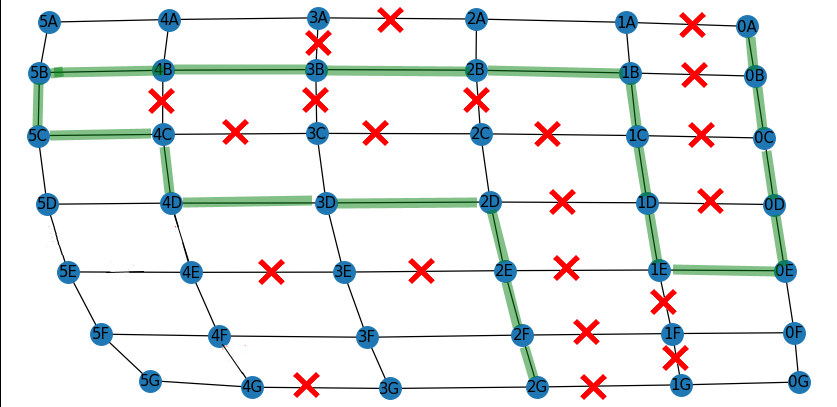

In [12]:
img = Image.open("graph/grid01_2.png")
img